In [1]:
import os

DS_PATH = r'result\ds_analysis'
QW_PATH = r'result\qw_analysis'

ds_analysis = {}
qw_analysis = {}


In [2]:
import json


for file in os.listdir(DS_PATH):
    with open(os.path.join(DS_PATH, file), 'r', encoding='utf-8') as f:
        ds_analysis.update(json.load(f))

for file in os.listdir(QW_PATH):
    with open(os.path.join(QW_PATH, file), 'r', encoding='utf-8') as f:
        qw_analysis.update(json.load(f))

In [50]:
error_users = []

for user_id, weibo_analysis in ds_analysis.items():
    for weibo in weibo_analysis.values():
        if len(weibo["comprehensive_sentiment"]) == 0:
            error_users.append(user_id)
            break

error_users

['1001430012',
 '1801338763',
 '2248101503',
 '2949924140',
 '3172291161',
 '3546777040',
 '3624139064',
 '3681240303',
 '5887043618',
 '6043796795',
 '6101933352',
 '6271248707',
 '6332324977',
 '6654253508',
 '6912934094',
 '7047985177',
 '7063914252',
 '7239865167',
 '7705770419',
 '7746905357']

In [51]:
for uid_error in error_users:
    ds_analysis.pop(uid_error)

In [ ]:
lst = ['1001430012',
 '1801338763',
 '2248101503',
 '2705063873',
 '2816685213',
 '2949924140',
 '3141809182',
 '3166824162',
 '3172291161',
 '3261271174',
 '3323506754',
 '3546777040',
 '3624139064',
 '3681240303',
 '3715513070',
 '3813056738',
 '3832044491',
 '3896825255',
 '5013527555',
 '5082623623',
 '5105183738',
 '5121007396',
 '5190588775',
 '5209582426',
 '5210902936',
 '5216332244',
 '5217097810',
 '5356704218',
 '5364752407',
 '5367078440',
 '5441421628',
 '5495640565',
 '5505248031',
 '5522088997',
 '5525441216',
 '5575267459',
 '5588724386',
 '5590110224',
 '5645336596',
 '5661381607',
 '5661589576',
 '5683735167',
 '5717088713',
 '5719269041',
 '5745817626',
 '5774341210',
 '5784479672',
 '5790069299',
 '5830863205',
 '5839704948',
 '5842336183',
 '5854086606',
 '5873660182',
 '5876947736',
 '5884394129',
 '5887043618',
 '5887206272',
 '5942997889',
 '5955487297',
 '5974099341',
 '6013913971',
 '6043796795',
 '6065745706',
 '6070381543',
 '6089170426',
 '6101933352',
 '6161688063',
 '6172970555',
 '6177735474',
 '6212772306',
 '6258278048',
 '6271248707',
 '6276883435',
 '6290288796',
 '6297315490',
 '6322464576',
 '6332324977',
 '6334797626',
 '6344726974',
 '6348242806',
 '6436264227',
 '6461934040',
 '6480963067',
 '6491859626',
 '6544519717',
 '6556739647',
 '6577703217',
 '6583248510',
 '6584202891',
 '6591168050',
 '6612516681',
 '6613559499',
 '6617336018',
 '6619269492',
 '6645361484',
 '6654253508',
 '6689492476',
 '6690928008',
 '6756322228',
 '6872461185',
 '6912934094',
 '6969046299',
 '6974601160',
 '7047985177',
 '7057634195',
 '7063914252',
 '7185520416',
 '7239865167',
 '7242595589',
 '7244733162',
 '7245725709',
 '7267222560',
 '7278720044',
 '7307048475',
 '7331152193',
 '7335108441',
 '7341520764',
 '7383682100',
 '7388571498',
 '7396917798',
 '7428567130',
 '7479144857',
 '7484337651',
 '7486507733',
 '7525568393',
 '7585338543',
 '7644023350',
 '7705770419',
 '7728166104',
 '7740840015',
 '7741864050',
 '7744777672',
 '7746905357',
 '7789655041',
 '7796539928',
 '7813081001']

In [8]:
import dbPy_analysis as dbPy

sql = f"""
UPDATE weibo_cleaned
SET done = 0
WHERE uid IN ({', '.join(error_users)})
"""

dbPy.execute_update(sql)

6128

In [44]:
ds_users = list(ds_analysis.keys())
qw_users = list(qw_analysis.keys())


In [45]:
def check_type(analysis_dict):
    type_set = set()

    for uid, weibo in analysis_dict.items():
        for wid, info in weibo.items():
            try:
                compre_sent = info["comprehensive_sentiment"]
                type = compre_sent["type"]
                # if len(type) == 0:
                #     print(info)
                type_set.add(type.split('-')[0])
            except KeyError as e:
                # print(f"{uid} 的 {wid} 出错：{info}")
                pass
    
    return type_set

In [46]:
check_type(ds_analysis)

{'中性', '中立', '复杂', '消极', '混合', '积极'}

In [47]:
def check_intensity(analysis_dict):
    # type_set = set()
    intensity_set = set()

    for uid, weibo in analysis_dict.items():
        for wid, info in weibo.items():
            try:
                compre_sent = info["comprehensive_sentiment"]
                # type = compre_sent["type"]
                intensity = compre_sent["intensity"]
                if intensity == 10:
                    print(compre_sent)
                # if len(type) == 0:
                #     print(info)
                # type_set.add(type.split('-')[0])
                intensity_set.add(intensity)
            except KeyError as e:
                # print(f"{uid} 的 {wid} 出错：{info}")
                pass
    
    return intensity_set

In [48]:
def check_factor(analysis_dict):
    # type_set = set()
    factor_list = []

    for uid, weibo in analysis_dict.items():
        for wid, info in weibo.items():
            try:
                compre_sent = info["comprehensive_sentiment"]
                type = compre_sent["type"]
                type_basic = type.split('-')[0]
                if type_basic == "积极":
                    factor = 1
                elif type_basic == "消极":
                    factor = -1
                else:
                    factor = 0
                
                intensity = compre_sent["intensity"]
                factor *= intensity
                # type_set.add(type.split('-')[0])
                factor_list.append(factor)
            except KeyError as e:
                # print(f"{uid} 的 {wid} 出错：{info}")
                pass
    
    return factor_list

In [49]:
from collections import Counter

factor_list = check_factor(ds_analysis)

counter = Counter(factor_list)

counter_list = [(factor, freq) for factor, freq in counter.items()]

sorted(counter_list, key=lambda x: x[0])

[(-10, 1544),
 (-9, 13450),
 (-8, 27064),
 (-7, 35186),
 (-6, 44454),
 (-5, 48310),
 (-4, 15636),
 (-3, 1927),
 (-2, 47),
 (0, 98753),
 (1, 1),
 (2, 33),
 (3, 1096),
 (4, 5092),
 (5, 27817),
 (6, 59087),
 (7, 84660),
 (8, 71759),
 (9, 27994),
 (10, 1612)]

In [ ]:
def get_value(info: dict):
    base_value = 5.0
    compre_sent = info["comprehensive_sentiment"]
    type_basic = compre_sent["type"].split('-')[0]
    if type_basic == "积极":
        polarity = 1
    elif type_basic == "消极":
        polarity = -1
    else:
        polarity = 0
    scaled_intensity = compre_sent["intensity"] * 0.5
    return max(0, min(10, round(base_value + polarity * scaled_intensity, 1)))

C:\Users\admin\AppData\Local\Temp\ipykernel_3888\3828826575.py:54: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('coolwarm')


(5.45, 2.4)

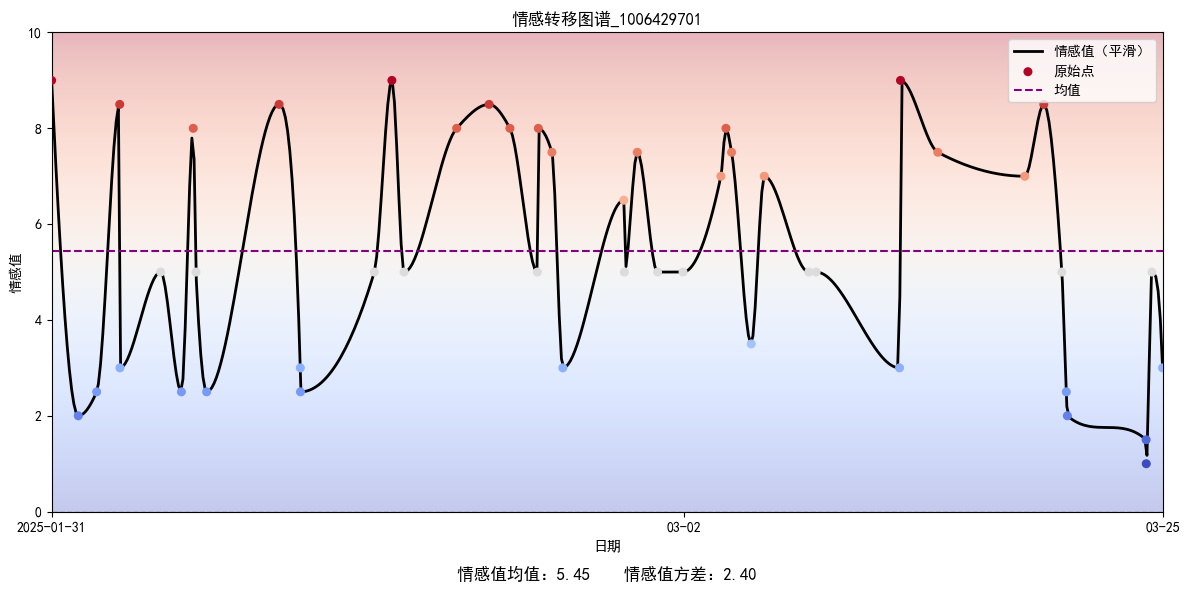

In [ ]:
from matplotlib.cm import get_cmap
from matplotlib.collections import LineCollection
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import PchipInterpolator, make_interp_spline,CubicSpline
from matplotlib.colors import Normalize
import matplotlib.dates as mdates
from datetime import timedelta
from datetime import datetime
# import matplotlib.colormaps as cmaps

from statsmodels.nonparametric.smoothers_lowess import lowess


def plot_sentiment_transition_map(uid, analysis, save=False):
    """绘制情感转移图谱，并返回情感值均值与方差

    Args:
        uid (str): 用户ID
        analysis (dict): 用户微博情感分析字段（wid为键）

    Returns:
        (float, float): 情感值均值，情感值方差
    """
    data = analysis
    records = []
    for wid, info in data.items():
        try:
            time_str = info["created_at"].replace(" ", "")  # 去除多余空格
            time_str = time_str.replace("：", ":")  # 替换中文冒号
            time = datetime.strptime(time_str, "%Y-%m-%d%H:%M:%S")
            value = get_value(info)
            records.append((time, value))
        except Exception as e:
            print(f"跳过 {wid}: {e}")

    # 3. 按时间排序
    records.sort(key=lambda x: x[0])

    # 4. 计算横坐标
    dates = [r[0] for r in records]
    y = [r[1] for r in records]


    # x = np.array(x)
    x = mdates.date2num(dates)
    y = np.array(y)

    # 1. 生成渐变色背景
    xmin, xmax = x.min(), x.max()
    ymin, ymax = 0, 10  # 根据你的情感值范围调整

    gradient = np.linspace(0, 1, 500).reshape(-1, 1)  # 500行，1列
    cmap = get_cmap('coolwarm')
    norm = Normalize(vmin=0, vmax=1)
    gradient_rgb = cmap(norm(gradient))

    fig, ax = plt.subplots(figsize=(12, 6))

    ax.imshow(
        gradient_rgb,
        aspect='auto',
        extent=[xmin, xmax, ymin, ymax],
        origin='lower',
        alpha=0.3  # 透明度，可调
    )

    # 2. 平滑曲线
    # 生成更密集的x用于平滑曲线
    x_smooth = np.linspace(x.min(), x.max(), 500)
    spl = PchipInterpolator(x, y)
    y_smooth = spl(x_smooth)


    # 3. 绘制平滑曲线
    ax.plot(mdates.num2date(x_smooth), y_smooth, color='black', linewidth=2, label='情感值（平滑）')

    sc = ax.scatter(x, y, c=y, cmap='coolwarm', s=30, zorder=3, label='原始点')

    mean_y = np.mean(y)
    ax.axhline(mean_y, color='purple', linestyle='--', linewidth=1.5, label='均值')


    std_y = np.std(y)
    mean_str = f"情感值均值：{mean_y:.2f}"
    std_str = f"情感值方差：{std_y:.2f}"
    ax.text(0.5, -0.13, f"{mean_str}    {std_str}", 
            ha='center', va='center', transform=ax.transAxes, fontsize=12)


    ax.axhline(0, color='gray', linestyle='--', linewidth=1)
    ax.set_xlabel('日期')
    ax.set_ylabel('情感值')
    ax.set_title(f'情感转移图谱_{uid}')
    ax.legend()

    tick_locs = mdates.drange(dates[0], dates[-1], timedelta(days=30))
    tick_locs = np.append(tick_locs, mdates.date2num(dates[-1]))  # 保证最后一个点

    # 生成自定义标签
    tick_dates = mdates.num2date(tick_locs)
    labels = []
    last_year = None
    for d in tick_dates:
        if last_year != d.year:
            label = f"{d.year}-{d.month:02d}-{d.day:02d}"
            last_year = d.year
        else:
            label = f"{d.month:02d}-{d.day:02d}"
        labels.append(label)

    ax.set_xticks(tick_locs)
    ax.set_xticklabels(labels, rotation=0, ha='center')

    plt.tight_layout()

    if save:
        plt.savefig(fr"D:\科研\Provincial_Mental_Health_2\LLM_Analysis\result\sentiment_transition_map\情感转移图谱_{uid}.png", dpi=100, bbox_inches='tight')

    # plt.show()
  
    return round(mean_y, 2), round(std_y, 2)

plot_sentiment_transition_map("1006429701", ds_analysis["1006429701"], save=True)

In [57]:
def get_sentiment_mean_std(analysis: dict):
    """根据情感分析结果，获得用户情感值均值与方差

    Args:
        analysis (dict): 情感分析字典（wid为键）

    Returns:
        (float, float): (情感值均值, 情感值方差)
    """
    values = [get_value(a) for a in analysis.values()]
    mean_value = np.mean(values).round(2)
    std_value = np.std(values).round(2) 

    return mean_value, std_value

statistic_analysis_dict = {}

for uid, analysis in ds_analysis.items():
    mean_value, std_value = get_sentiment_mean_std(analysis)
    statistic_analysis_dict[uid] = (mean_value, std_value)

In [58]:
count = 0
for uid, mean_std in statistic_analysis_dict.items():
    if mean_std[0] <= 5.0:
        # print(f"{uid}: {mean_std}")
        count += 1

count

4091

C:\Users\admin\AppData\Local\Temp\ipykernel_3888\3828826575.py:54: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('coolwarm')


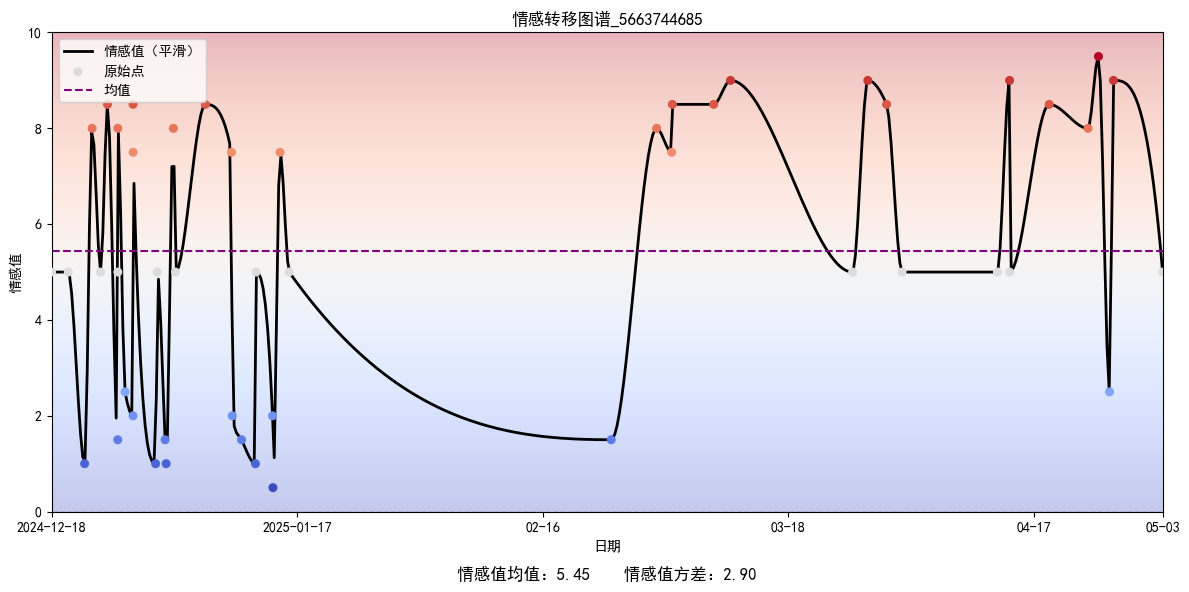

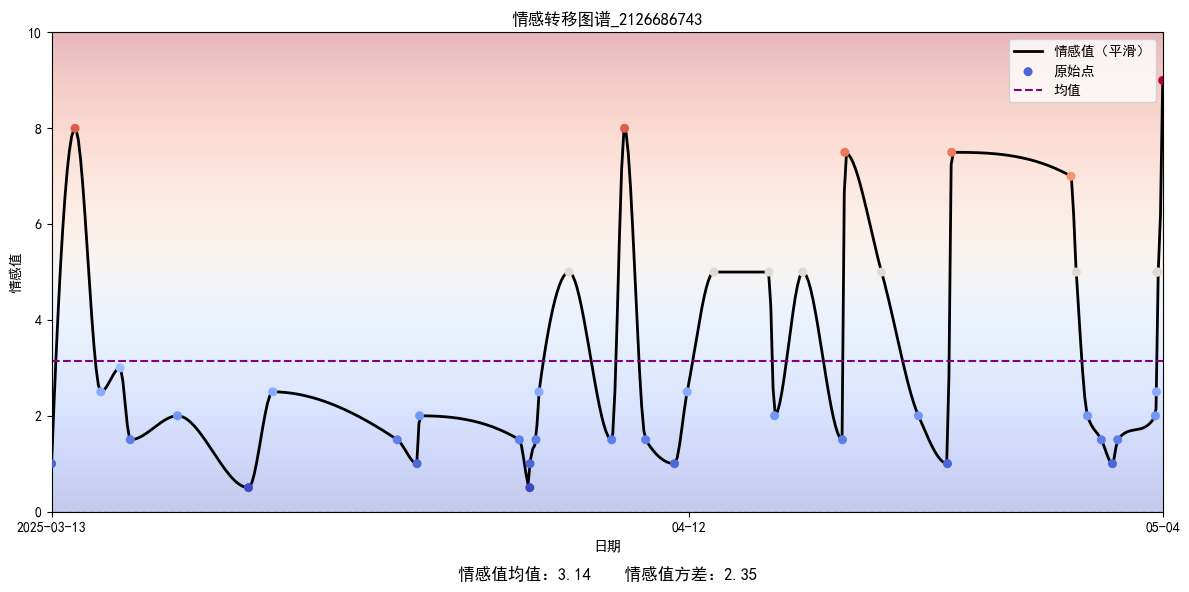

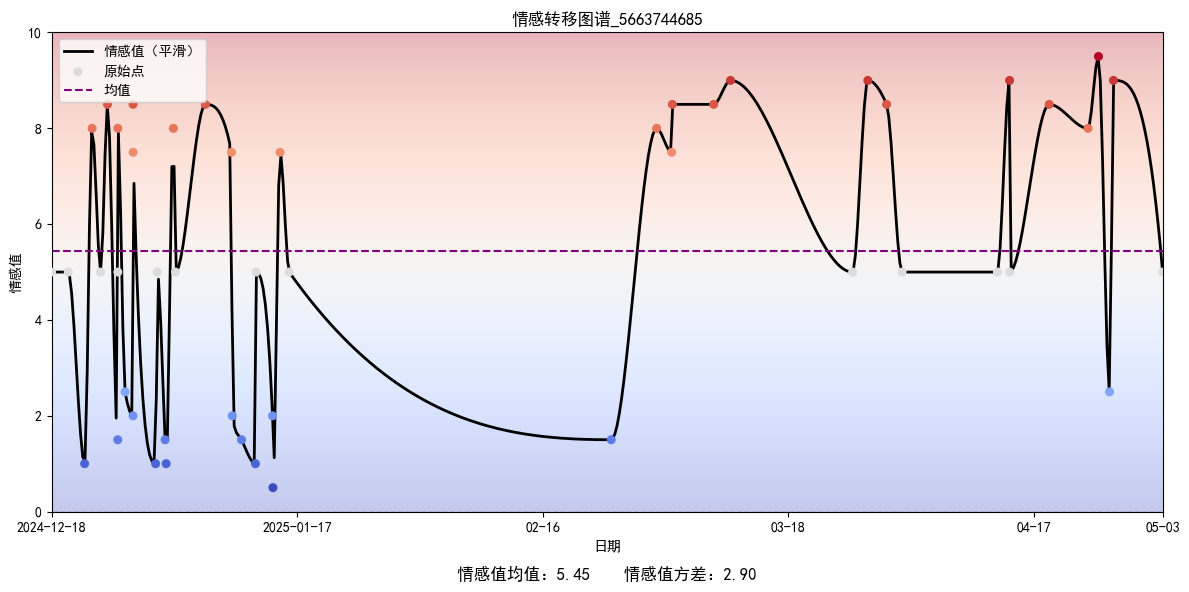

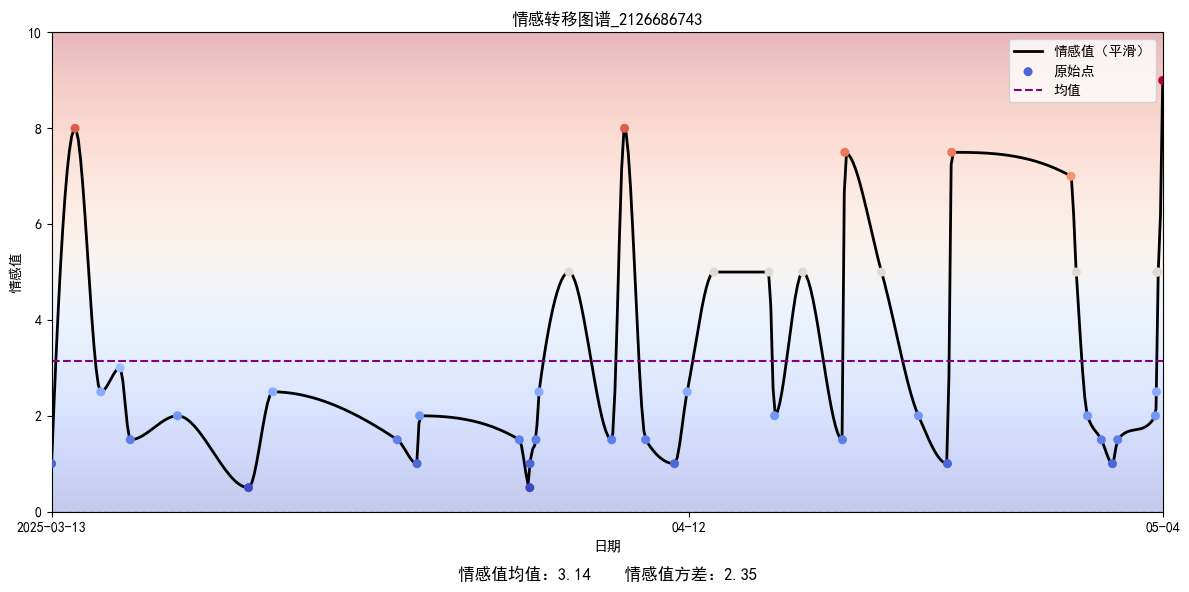

In [46]:
import random

test_users = random.sample(list(ds_analysis.items()), 2)

for analysis in test_users:
    for user_id, user_analysis in test_users:
        plot_sentiment_transition_map(user_id, user_analysis, True)


C:\Users\admin\AppData\Local\Temp\ipykernel_3888\3828826575.py:54: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('coolwarm')


(8.61, 0.91)

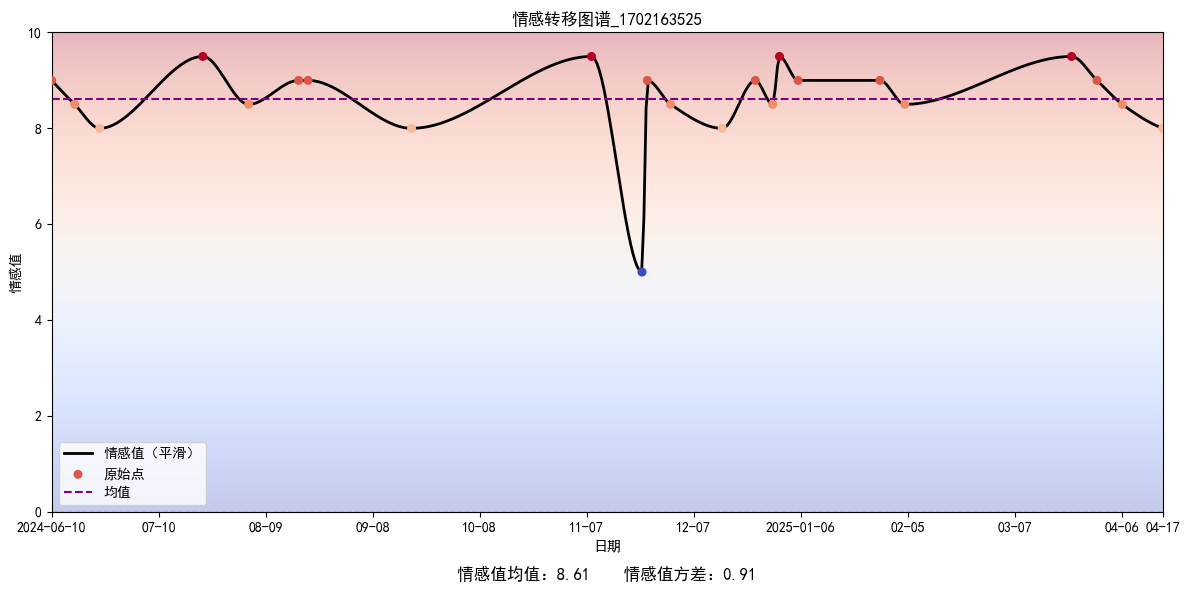

In [56]:
plot_sentiment_transition_map("1702163525", ds_analysis["1702163525"])

In [11]:
0x0f

15